# <div style="text-align:center; color:rgba(37, 40, 80);">11752 Machine Learning</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Master in Intelligent Systems</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Universitat de les Illes Balears</div>

### <div style="text-align:center; color:white;"> Handout #3: **Unsupervised learning**</div>

#### **Integrants:** Jason Adel Noboa Rivera, Pedro Marti Pico
#### **Group:** 07

##### T0. Normalize the dataset samples using max-min normalization and consider the following cases:



In [12]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score


## Data preparation
### (a) Consider the original dataset and a lower-dimensional version obtained through PCA retaining 95% of the variance.

In [10]:
digits = load_digits ()
samples = digits.data
labels = digits.target
X = samples[(labels == 5) | (labels == 7) | (labels == 9)]
y = labels[(labels == 5) | (labels == 7) | (labels == 9)]

print("Filtered Data:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Applying PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print("\nPCA Transformed Data:")
print("X_pca shape:", X_pca.shape)


Filtered Data:
X shape: (541, 64)
y shape: (541,)

PCA Transformed Data:
X_pca shape: (541, 27)


## Clustering
### (b) Cluster your dataset for m = 2, 3, 4 and 5 clusters and report on the performance attained in each case using the v-measure.

In [15]:
# Function to perform clustering and evaluate with v-measure
def cluster_and_evaluate(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred = kmeans.fit_predict(X)
    return v_measure_score(y, y_pred)

# Clustering and evaluating for 2, 3, 4, and 5 clusters on both original and PCA-transformed data
for n_clusters in [2, 3, 4, 5]:
    v_measure_original = cluster_and_evaluate(X, n_clusters)
    v_measure_pca = cluster_and_evaluate(X_pca, n_clusters)
    print(f"V-measure for {n_clusters} clusters: Original Data = {v_measure_original}, PCA Data = {v_measure_pca}")

c:\Users\Pedro\anaconda3\envs\AIV_P1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pedro\anaconda3\envs\AIV_P1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pedro\anaconda3\envs\AIV_P1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pedro\anaconda3\envs\AIV_P1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

V-measure for 2 clusters: Original Data = 0.4123990769454228, PCA Data = 0.4131927643040439
V-measure for 3 clusters: Original Data = 0.6776585535614549, PCA Data = 0.6776585535614549
V-measure for 4 clusters: Original Data = 0.616329099414642, PCA Data = 0.616329099414642
V-measure for 5 clusters: Original Data = 0.6360224341080897, PCA Data = 0.641073639388315


c:\Users\Pedro\anaconda3\envs\AIV_P1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pedro\anaconda3\envs\AIV_P1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Best Case Analysis
### (c) For the best case among the 8 possible combinations resulting from (a) and (b):
### i. Compute the contingency matrix.

In [16]:
# Assuming best case is 5 clusters with PCA data
kmeans_best = KMeans(n_clusters=5, random_state=42)
y_pred_best = kmeans_best.fit_predict(X_pca)

contingency_matrix = confusion_matrix(y, y_pred_best)
print("Contingency Matrix:\n", contingency_matrix)

Contingency Matrix:
 [[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  9  75   0  98   0   0   0   0]
 [  0   0  67   0 112   0   0   0]
 [143   2  29   4   2   0   0   0]]


c:\Users\Pedro\anaconda3\envs\AIV_P1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
# Check unique classes in the dataset
unique_classes = np.unique(y)
print("Unique classes in the dataset:", unique_classes)

# Construct the contingency matrix
contingency_matrix = confusion_matrix(y, y_pred_best)
print("Contingency Matrix:\n", contingency_matrix)


Unique classes in the dataset: [5 7 9]
Contingency Matrix:
 [[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  9  75   0  98   0   0   0   0]
 [  0   0  67   0 112   0   0   0]
 [143   2  29   4   2   0   0   0]]


### ii. Determine the assignment of classes to clusters.


In [19]:
class_labels = [5, 7, 9]

# Determine the most common cluster assignment for each class
for i, class_label in enumerate(class_labels):
    most_common_cluster = np.argmax(contingency_matrix[i])
    print(f"Class {class_label} is most commonly assigned to Cluster {most_common_cluster + 1}")

Class 5 is most commonly assigned to Cluster 1
Class 7 is most commonly assigned to Cluster 1
Class 9 is most commonly assigned to Cluster 1


### iii. Identify the number of incorrectly clustered samples and calculate also the percentage of errors as number of incorrectly clustered samples / total number of samples.

In [29]:
# Determining the most common cluster assignment for each class
most_common_clusters = [np.argmax(contingency_matrix[i]) for i in range(len(class_labels))] #Aqui uso lo mismo que antes

# Dictionary creation for map the class labels to their most common clusters
class_to_cluster = {class_label: cluster for class_label, cluster in zip(class_labels, most_common_clusters)}

# Mapping of the actual class labels to their predicted clusters
predicted_clusters = [class_to_cluster.get(label, -1) for label in y]

# Amount of mismatches between actual clusters and predicted ones
incorrectly_clustered = np.sum(np.array(predicted_clusters) != kmeans_best.labels_)

# Calculate the percentage of errors
total_samples = len(y)
error_percentage = (incorrectly_clustered / total_samples) * 100

print("Number of incorrectly clustered samples:", incorrectly_clustered)
print("Percentage of errors:", error_percentage, "%")


Number of incorrectly clustered samples: 389
Percentage of errors: 71.90388170055454 %


### iv. Report also on the homogeneity and the completeness measures.

In [25]:
homogeneity = homogeneity_score(y, y_pred_best)
completeness = completeness_score(y, y_pred_best)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)

Homogeneity: 0.7826175523849788
Completeness: 0.5428872565568666


### v. In case there are mistakes, show one example of each case using the following source code (X is the matrix with the samples and ndx is the index of an incorrectly clustered sample, e.g. a sample from class 0 clustered as if it was from class 6)

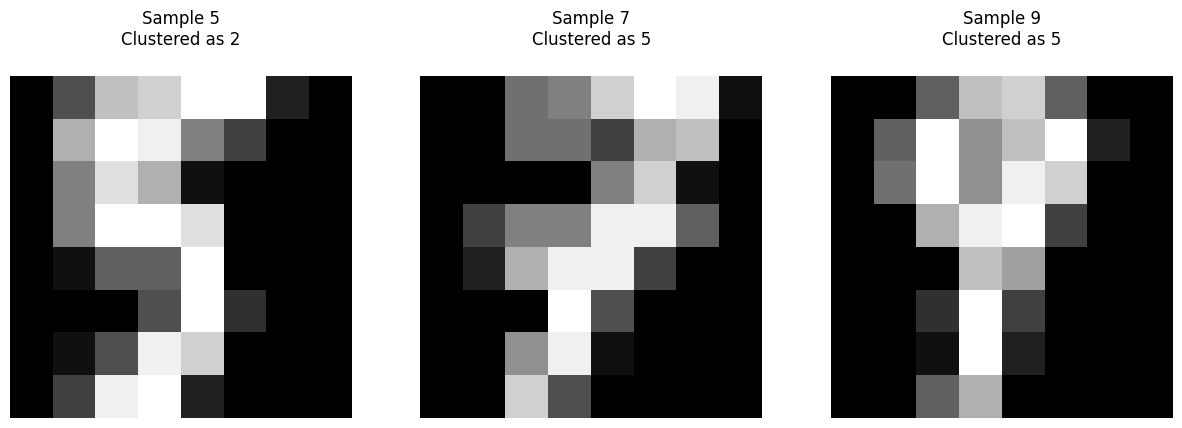

In [28]:
import matplotlib.pyplot as plt

unique_classes = np.unique(y)
plt.figure(figsize=(15, 8))

for i, class_label in enumerate(unique_classes):
    # Here we are findsing the first instance where the predicted cluster does not match the actual class
    incorrect_indices = np.where((y == class_label) & (y_pred_best != y_pred_best[np.argmax(contingency_matrix[i])]))[0]
    if len(incorrect_indices) > 0:
        ndx = incorrect_indices[0]  # Index first incorect smple
        plt.subplot(1, len(unique_classes), i + 1)
        plt.gray()
        plt.matshow(X[ndx].reshape(8, 8), fignum=False)
        predicted_cluster = y_pred_best[ndx] + 1  # Matcheamos con el primero
        plt.title(f'Sample {class_label}\nClustered as {predicted_cluster}')
        plt.axis('off')

plt.show()